# 実践演習5-4

Scikit learn の GaussianNBとLogisticRegression でglassデータを識別します。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.io import arff
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## データの読み込み

arff形式のデータを読み込み、@data以下の情報を変数dataに、@attributeの情報を変数metaに格納します。Wekaがインストールされたフォルダのdataフォルダにあるglass.arffをコピーしてnotebookと同じフォルダに置いておくと長いパスの指定が不要になります。

In [2]:
data, meta = arff.loadarff('glass.arff')

dataはタプルを要素とする1次元arrayです。1つのタプルは9つの浮動小数点数（特徴ベクトル）と、1つの文字列（正解クラス）から構成されます。  

まず、X（パターン行列）とy（正解クラスのベクトル）の型をnp.emptyを使って宣言します。それから、forループを使って、dataの各要素をlistに変換し、そのlistの最初の9つの要素を特徴ベクトルをXに、最後の文字列をyに追加します。

In [3]:
X = np.empty((0,9), np.float)
y = np.empty((0,1), np.str)
for e in data:
    e2 = list(e)
    X = np.append(X, [e2[0:9]], axis=0)
    y = np.append(y, e2[9:10])

## データの可視化

PCAのインスタンスを作成し、fitメソッドで2次元に変換します。そして、explained_variance\_ratio\_ 属性の値で寄与率を確認します。

In [4]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(pca.explained_variance_ratio_) 

[ 0.47620525  0.26319276]


fit_transformメソッドで2次元に変換したデータをX2に格納します。グラフ表示は、クラスを区別するための点の種類のリストを作成し（定義上は7クラスですが、学習データには6クラス分のデータしかないので、長さ6とします。）、set(y)で作成したクラスラベル集合をzipで組み合わせてforループを回してplotします。

'build wind float' bo
containers go
tableware ro
'vehic wind float' c<
'build wind non-float' m<
headlamps y<


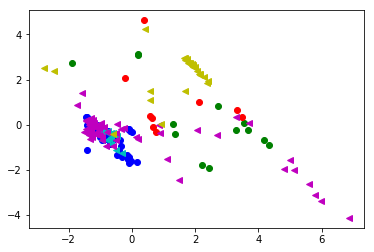

In [6]:
X2 = pca.fit_transform(X)
co = ['bo', 'go', 'ro', 'c<', 'm<', 'y<'] 
for t, c in zip(set(y), co):
    print(t,c)
    plt.plot(X2[y==t,0], X2[y==t,1], c)

## ナイーブベイズ

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。

In [7]:
clf1 = GaussianNB()
clf1.fit(X, y)

GaussianNB(priors=None)

In [8]:
scores = cross_val_score(clf1, X, y, cv=9)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

44.11 +/- 10.69 %


### 学習結果の表示

平均(theta)と分散(sigma)を表示します。

In [9]:
clf1.theta_

array([[  1.51871829e+00,   1.32422857e+01,   3.55242857e+00,
          1.16385714e+00,   7.26191429e+01,   4.47428571e-01,
          8.79728571e+00,   1.27142857e-02,   5.70000000e-02],
       [  1.51861855e+00,   1.31117105e+01,   3.00210526e+00,
          1.40815789e+00,   7.25980263e+01,   5.21052632e-01,
          9.07368421e+00,   5.02631579e-02,   7.97368421e-02],
       [  1.51796353e+00,   1.34370588e+01,   3.54352941e+00,
          1.20117647e+00,   7.24047059e+01,   4.06470588e-01,
          8.78294118e+00,   8.82352941e-03,   5.70588235e-02],
       [  1.51892769e+00,   1.28276923e+01,   7.73846154e-01,
          2.03384615e+00,   7.23661538e+01,   1.47000000e+00,
          1.01238462e+01,   1.87692308e-01,   6.07692308e-02],
       [  1.51711621e+00,   1.44420690e+01,   5.38275862e-01,
          2.12275862e+00,   7.29658621e+01,   3.25172414e-01,
          8.49137931e+00,   1.04000000e+00,   1.34482759e-02],
       [  1.51745556e+00,   1.46466667e+01,   1.30555556e+00,
   

In [10]:
clf1.sigma_

array([[  5.07284502e-06,   2.45740492e-01,   6.01583898e-02,
          7.35494102e-02,   3.19679267e-01,   4.55133898e-02,
          3.25682635e-01,   6.92834901e-03,   7.82100207e-03],
       [  1.42680227e-05,   4.35303655e-01,   1.45838768e+00,
          1.00007135e-01,   5.18097422e-01,   4.50778414e-02,
          3.64409432e+00,   1.29563091e-01,   1.11788802e-02],
       [  3.45848189e-06,   2.41820763e-01,   2.49404865e-02,
          1.13645677e-01,   2.46989621e-01,   4.97404865e-02,
          1.35985469e-01,   1.24567681e-03,   1.09501751e-02],
       [  1.03325963e-05,   5.57340830e-01,   9.21500594e-01,
          4.44485209e-01,   1.51785444e+00,   4.22216923e+00,
          4.40210059e+00,   3.41510061e-01,   2.23455642e-02],
       [  6.25608747e-06,   4.54843997e-01,   1.20613841e+00,
          1.89247564e-01,   8.53555293e-01,   4.31473248e-01,
          9.15032582e-01,   4.27413795e-01,   8.57076982e-04],
       [  8.63149551e-06,   1.04453334e+00,   1.06995803e+00,
   

### ロジスティック識別

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。


In [11]:
clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
scores = cross_val_score(clf2, X, y, cv=9)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

60.94 +/- 8.68 %


### 学習結果の表示

重み(coef)と切片(intercept)を表示します。

In [13]:
clf2.coef_

array([[-0.04080889, -0.62557924,  1.32733487, -1.99540111,  0.07417966,
        -0.26990867,  0.09360843,  0.06182113, -0.44019746],
       [ 0.04522764, -0.53598246,  0.51580677,  1.01972127,  0.00704678,
        -0.052682  ,  0.34205613, -0.63337201,  0.70984678],
       [-0.00254086,  0.28707564,  0.84067056, -0.27595678, -0.12579188,
        -0.2718875 ,  0.07576765, -0.33585629, -0.0313153 ],
       [ 0.01346223, -0.62365864, -0.59687835,  1.62479405,  0.01426913,
         0.906814  ,  0.27188026, -0.72954363, -0.07208385],
       [-0.009179  ,  0.31697825, -1.16098487,  0.77672637,  0.01926323,
        -0.60007078, -0.76635438,  1.16709254, -0.26943387],
       [-0.05984987,  1.08634062, -0.56851547, -0.33427904, -0.20089074,
        -1.35622319, -0.10021943, -1.75671379, -0.27533856]])

In [14]:
clf2.intercept_

array([-0.03088465,  0.02942531,  0.00707706,  0.01202722, -0.01097748,
       -0.03516306])

### この演習問題で得られた知見

glassデータのようにクラス毎のデータが複雑に入り組んでいるような場合は、識別モデルの方が高い性能を示すことが多いようです。